Введение в рекурсию

Ранее мы встречались с функциями, которые вызывают другие функции. Рассмотрим функцию get_stat(), которая принимает в качестве аргумента непустой список целых чисел и возвращает кортеж, состоящий из трех значений: минимальный элемент списка, максимальный элемент списка и среднее арифметическое значение всех элементов списка.

In [1]:
def get_stat(numbers):
    minimum = min(numbers)
    maximum = max(numbers)
    average = sum(numbers)/len(numbers)

    return (minimum, maximum, average)

print(get_stat([1, 2, 3, 4, 5]))
print(get_stat([7]))

(1, 5, 3.0)
(7, 7, 7.0)


Как мы видим, написанная нами функция get_stat() вызывает функции: min(), max(), sum(), len(). На практике такая ситуация очень распространена.

Бывают случаи, когда функция также вызывает саму себя. Такая функция называется рекурсивной.

Рекурсивная функция – это функция, которая вызывает саму себя.

Рассмотрим определение рекурсивной функции message(), которая вызывает саму себя.

In [2]:
def message():
    print('Это рекурсивная функция')
    message()

message()

Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная 

RecursionError: maximum recursion depth exceeded

И этот результат будет повторяться бесконечно (почти).

Функция message() выводит на экран строку текста Это рекурсивная функция, а затем вызывает саму себя. При каждом вызове функцией самой себя цикл повторяется. Несложно заметить, что при такой реализации функции message() в ней не предусмотрен способ остановки рекурсивных вызовов. Эта функция выглядит как бесконечный цикл, поскольку отсутствует программный код, который остановил бы ее бесконечные вызовы.

В ситуации когда не предусмотрен способ остановки рекурсивных вызовов происходит переполнение аппаратного стека и возбуждается исключение RecursionError.

Подобно циклу, рекурсивная функция должна иметь определенный способ управлять количеством своих повторов.

In [3]:
def message(times):
    if times > 0:
        print('Это рекурсивная функция')
        message(times - 1)

message(5)

Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция


В контексте рекурсивной функции, когда вы вызываете message(times - 1), вы передаете в следующий рекурсивный вызов уже уменьшенное значение times. Однако значение переменной times не изменяется в самой функции, потому что передача параметра в рекурсивный вызов происходит как копия значения, а не ссылка на сам объект.

In [4]:
def message(times):
    if times > 0:
        print(f"times = {times}")
        times -= 1  # Здесь изменяется значение times, но только на текущем уровне.
        message(times)  # Однако передается измененная версия times, а не оригинал.

message(5)

times = 5
times = 4
times = 3
times = 2
times = 1


Теперь функция message() принимает аргумент times, который задает количество раз, которые функция должна выводить сообщение. Строка текста Это рекурсивная функция будет выводиться до тех пор, пока times больше нуля, при этом функция будет вызывать саму себя повторно, передавая уменьшенный на единицу аргумент.

Во время каждого вызова функции message() в оперативной памяти создается новый экземпляр переменной times. При первом вызове функции times имеет значение 5. Когда функция себя вызывает, создается новый экземпляр переменной times и в него передается значение 4. Этот цикл повторяется до тех пор, пока в функцию в качестве аргумента не будет передан 0.

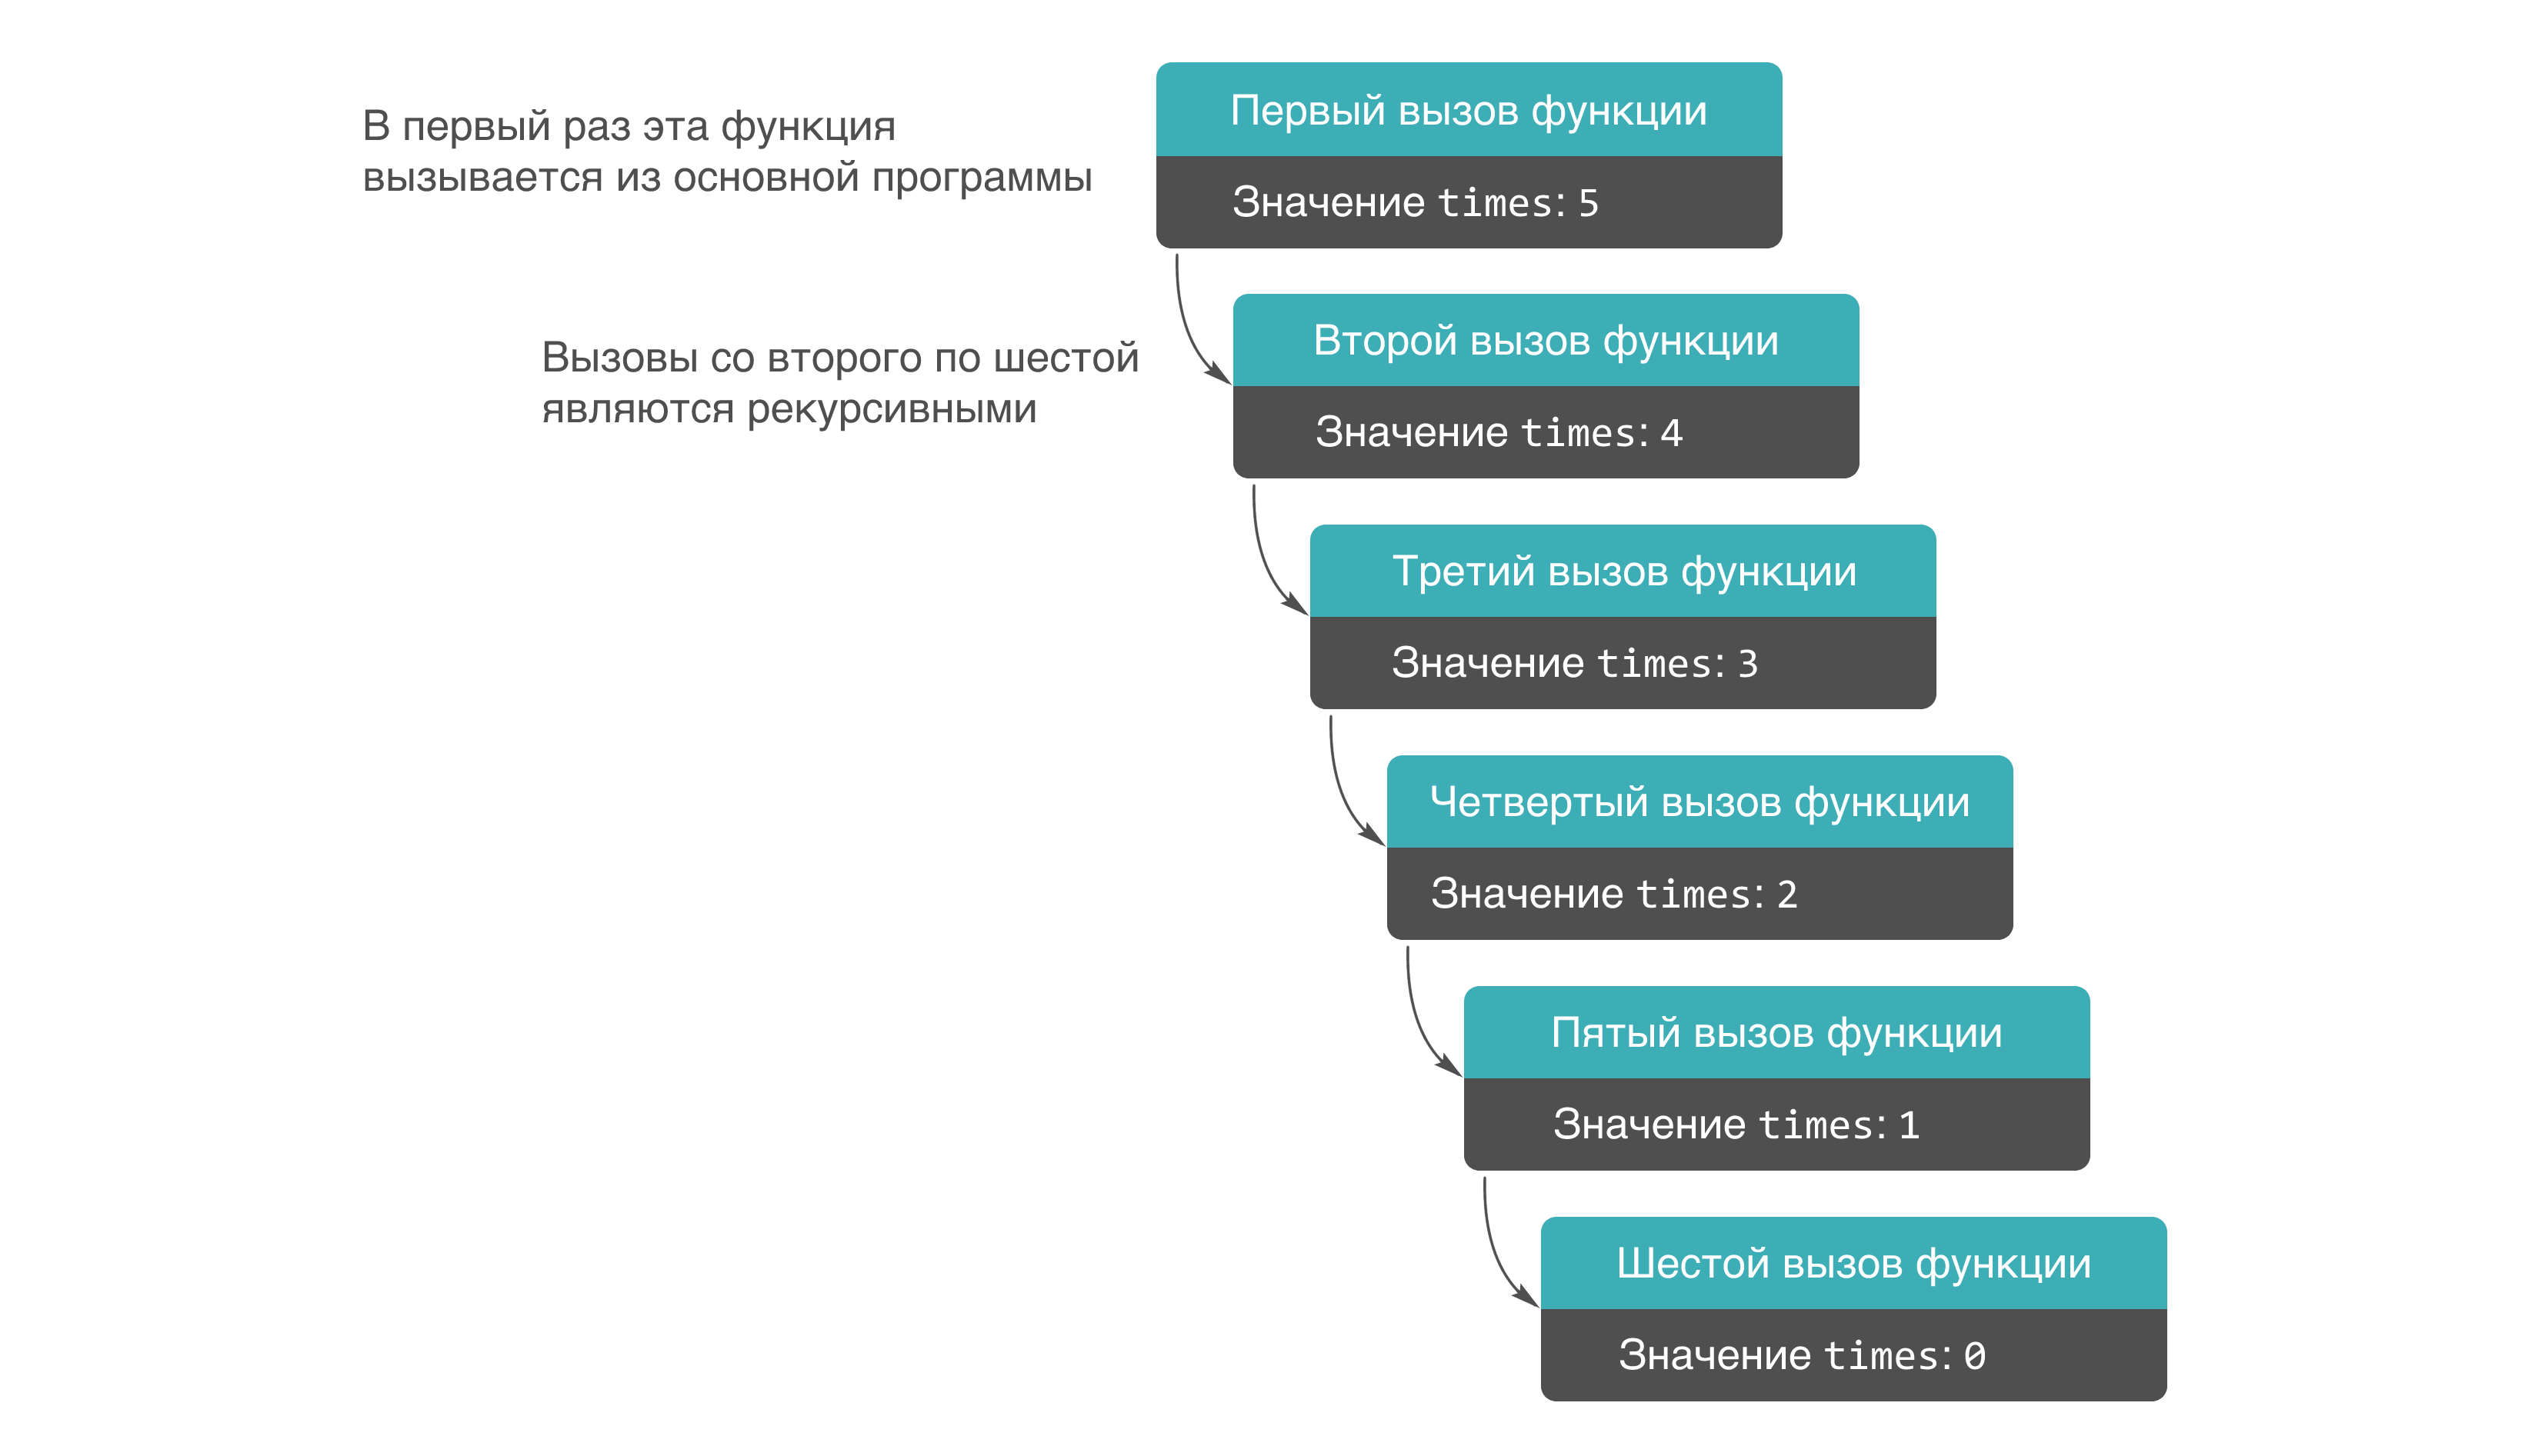

In [5]:
__import__('functions').picture('Новый проект (1 ) (1).png')

Как видно из рисунка, функция message() вызывается шесть раз. В первый раз она вызывается из основной программы, а остальные пять раз она вызывает саму себя. Количество раз, которые функция вызывает саму себя, называется глубиной рекурсии. В этом примере глубина рекурсии равняется пяти. Когда функция достигает своего шестого вызова, значение переменной times равно 0. В этой точке условное выражение оператора if становится ложным, и поэтому функция завершает свою работу. Поток управления программы возвращается из шестого экземпляра функции в точку в пятом экземпляре непосредственно после вызова рекурсивной функции.

In [1]:
def message(times):
    if times > 0:
        print(f"times = {times}")
        message(times - 1)  # рекурсивный вызов
    else:
        print("Завершение рекурсии")

message(5)

times = 5
times = 4
times = 3
times = 2
times = 1
Завершение рекурсии


Поскольку после вызова рекурсивной функции больше нет инструкций, пятый экземпляр функции message() возвращает поток управления программы назад в четвертый экземпляр функции и т.д.

Давайте модифицируем нашу функцию message(), добавив строку кода, которая выводит текущее значение переменной times после рекурсивного вызова.

In [2]:
def message(times):
    if times > 0:
        print('Это рекурсивная функция.')
        message(times - 1)
        print(times)

message(5)

Это рекурсивная функция.
Это рекурсивная функция.
Это рекурсивная функция.
Это рекурсивная функция.
Это рекурсивная функция.
1
2
3
4
5


Обратите внимание на то, что сначала печатается значение 1, затем 2 и так далее до 5.

Причина, по которой строка "Это рекурсивная функция." печатается 5 раз подряд, а не с чередующимся изменяющимся значением от 1 до 5, заключается в порядке выполнения рекурсивных вызовов.

Объяснение:

Рекурсия и порядок вызовов: Когда мы вызываем рекурсивную функцию с message(times - 1), выполнение функции "приостанавливается" на текущем уровне, пока не завершатся все рекурсивные вызовы. Это означает, что все вызовы функции с times > 0 выполняются перед тем, как вернуться к выполнению следующих строк, включая print(times).

Рекурсивный вызов: Когда мы вызываем message(times - 1), это вызывает функцию с уменьшенным значением times(почему это так и как это работает писал тут: жмак).Эта новая версия функции снова вызывает саму себя (рекурсия мать её), пока не достигнет базового случая (когда times станет равным 0).

Печать "Это рекурсивная функция.": В каждом вызове рекурсивной функции строка print('Это рекурсивная функция.') выполняется, но не выводится сразу на экран. Вместо этого, она добавляется в очередь выполнения, и рекурсивные вызовы продолжаются, пока не дойдем до базового случая. После этого программа начинает возвращаться назад, и тогда уже начинают выполняться все отложенные инструкции.

Почему не печатается сразу "1", "2", и т.д.: Инструкция print(times) выполняется после рекурсивного вызова. Это означает, что сначала происходит рекурсивный вызов с уменьшением times, и только после того, как все рекурсивные вызовы завершатся, выполнение вернется в текущую точку, и произойдет печать значения переменной times.

Поэтому сначала печатается 5 раз "Это рекурсивная функция.", и только потом начинает выполняться печать значений переменной times, начиная с 1 и до 5.

Пример выполнения:

Первый вызов: message(5):

Печатает "Это рекурсивная функция."
Рекурсивно вызывает message(4).
Второй вызов: message(4):

Печатает "Это рекурсивная функция."
Рекурсивно вызывает message(3).
Третий вызов: message(3):

Печатает "Это рекурсивная функция."
Рекурсивно вызывает message(2).
Четвертый вызов: message(2):

Печатает "Это рекурсивная функция."
Рекурсивно вызывает message(1).
Пятый вызов: message(1):

Печатает "Это рекурсивная функция."
Рекурсивно вызывает message(0).
Шестой вызов: message(0):

Условие if times > 0 становится ложным.
Выход из рекурсии, возвращаемся в предыдущий вызов.
Теперь выполнение начинается возвращаться:

В пятом вызове (message(1)), после того как закончились рекурсивные вызовы, печатается print(1).
В четвертом вызове (message(2)), печатается print(2).
И так далее.
Итог:

Так как рекурсивный вызов происходит до того, как выполняется код, стоящий после него, сначала выполняется несколько уровней рекурсии, печатается "Это рекурсивная функция." на каждом уровне, и только после завершения всех рекурсивных вызовов программа начинает выполнять печать значений переменной times.

Это рекурсивная функция. 
Это рекурсивная функция. 
Это рекурсивная функция. 
Это рекурсивная функция. 
Это рекурсивная функция. 
1 
2 
3 
4 
5 
Таким образом, рекурсия в Python работает по принципу «вниз по рекурсии, вверх по возвращению». Вот почему в нашем примере сначала выполняются все рекурсивные вызовы (печатается 5 строк "Это рекурсивная функция."), а затем, когда рекурсивные вызовы начинают возвращаться (базовый случай с times == 0), начинают выполняться строки после рекурсивных вызовов, печатая значения от 1 до 5.

Это поведение также иллюстрирует, как рекурсия работает со «стеком вызовов». Каждый раз, когда мы вызываем функцию рекурсивно, она помещается в стек, и выполнение функции приостанавливается, пока не завершится последний рекурсивный вызов. Как только рекурсивные вызовы достигнут базового случая (в нашем случае times == 0), функции начинают возвращаться, и стек «раскрывается», выполняя команды, которые были отложены.

Таким образом, важно помнить, что рекурсия всегда идет «вниз» по цепочке вызовов, и только после достижения базового случая и возвращения по цепочке вызовов выполняются инструкции, следующие за рекурсивным вызовом, включая печать значений переменной.

В общем, работа стека рекурсивных вызовов в Python заключается в том, что строка «рекурсивная функция» печатается до того, как функция вернется к выполнению печати значений переменной times.

Примечания

Примечание 2. Рекурсия может оказаться мощным инструментом для решения повторяющихся задач. Задача может быть решена на основе рекурсии, если ее разделить на уменьшенные задачи, которые по структуре идентичны общей задаче.

Примечание 3. Обратите внимание, что рекурсия никогда не является непременным условием для решения задачи. Любая задача, которая может быть решена рекурсивно, также может быть решена на основе цикла, и наоборот.

Примечание 4. Рекурсивные алгоритмы обычно менее эффективны, чем итеративные алгоритмы. Это связано с тем, что процесс вызова функции требует выполнения компьютером нескольких действий. Эти действия включают выделение памяти под параметры и локальные переменные и для хранения адреса местоположения программы. Такие действия, которые иногда называются накладными расходами, происходят при каждом вызове функции. Накладные расходы не требуются при использовании цикла.

Примечание 5. Некоторые повторяющиеся задачи легче решаются на основе рекурсии, чем на основе цикла. Там, где цикл приводит к более быстрому времени исполнения, программист может быстрее разработать рекурсивный алгоритм. В целом рекурсивная функция работает следующим образом:

если в настоящий момент задача может быть решена без рекурсии, то функция ее решает
если в настоящий момент задача не может быть решена, то функция ее сводит к уменьшенной и при этом аналогичной задаче и вызывает саму себя для решения этой уменьшенной задачи

Для того чтобы применить такой подход, во-первых, мы идентифицируем по крайней мере один случай, в котором задача может быть решена без рекурсии. Он называется базовым случаем. Во-вторых, мы определяем то, как задача будет решаться рекурсивно во всех остальных случаях. Это называется рекурсивным случаем. В рекурсивном случае мы все время должны сводить задачу к уменьшенному варианту исходной задачи. С каждым рекурсивным вызовом задача уменьшается. В результате будет достигнут базовый случай, и рекурсия прекратится.

Примечание 6. Хвостовая рекурсия — частный случай рекурсии, при котором любой рекурсивный вызов является последней операцией перед возвратом из функции.

Пример функции с хвостовой рекурсией:

In [5]:
def message(times):
    if times > 0:
        print('Это рекурсивная функция')
        message(times - 1)
message(5)

Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция
Это рекурсивная функция


Пример функции с рекурсией, которая не является хвостовой:

In [6]:
def message(times):
    if times > 0:
        print('Это рекурсивная функция.')
        message(times - 1)
        print(times)
message(5)

Это рекурсивная функция.
Это рекурсивная функция.
Это рекурсивная функция.
Это рекурсивная функция.
Это рекурсивная функция.
1
2
3
4
5


Хвостовой вид рекурсии примечателен тем, что может быть легко заменён на итерацию путём корректной перестройки кода функции. Оптимизация хвостовой рекурсии путём преобразования её в итерацию реализована во многих языках программирования. В Python такой оптимизации нет.

Примечание 8. Аппаратный стек используется для нужд выполняющейся программы: хранения переменных и вызова функций. При вызове функции процессор помещает в стек адрес команды, следующей за командой вызова функции, — «адрес возврата» из функции. По команде возврата из функции из стека извлекается адрес возврата и осуществляется переход по этому адресу.

In [12]:
def bee(n):
    if n > 0:
        print(n)
        bee(n - 1)
    print(n)

bee(2)

2
1
0
1
2


In [14]:
def bee(n):
    print(n)
    if n > 0:
        print(n)
        bee(n - 1)

bee(2)

2
2
1
1
0


In [15]:
def bee(n):
    if n >= 7:
        print('bee')
    else:
        bee(n + 1)
        print(n)
        
bee(4)

bee
6
5
4
